### Ref Funcs

In [1]:
def print_dict(d, depth=0, _space=0, with_value=False,
               only_first_sample=False,
               only_key: str = None, only_key_ind: int = None
               ):
    
    r""""
    Args:
        - depth: Print all nested dictionaries upto a specific depth
        - _space: Space to leave for a certain depth dictionary items
        - with_value: Print values if at the final depth
        - only_first_sample: Only print the first key (and value) of the dictionary
        - only_key: Only print the given key info
        - only_key_ind: Only print the key info corresponding to the given key index
    """

    assert isinstance(d, dict), "Provided Input is not a Dictionary!"

    if only_key is not None: print_dict(d[key], depth, _space, with_value, only_first_sample)
    
    elif only_key_ind is not None: 
        keys_list = list(d.keys())
        key = keys_list[only_key_ind]
        print_dict(d[key], depth, _space, with_value, only_first_sample)

    else:
        for count, key in enumerate(d):
            
            print_text = " "*_space + f" - {key}"
            if not isinstance(d[key], dict) and with_value: print_text += f": {d[key]}"
            print(print_text)
            
            if depth>0: 
                if not isinstance(d[key], dict): continue
                print_dict(d[key], depth-1, _space+3, with_value)

            if only_first_sample: return

### Download LIP Dataset

In [ ]:
import kagglehub

# path = kagglehub.dataset_download("roneoz/lip-dataset")
# path

/mnt/anaconda3/envs/schp_mod/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
import os

check_path = "data/"

check_dirs = ["train_images", "train_segmentations", "val_images", "val_segmentations"]
for d in check_dirs:
    dir_path = os.path.join(check_path, d)

    print(f"Num Files in {d}: {len(os.listdir(dir_path))}")

print("\n")

check_txts = ["train_id.txt", "val_id.txt"]
for t in check_txts:

    txt_path = os.path.join(check_path, t)

    with open(txt_path, "r") as f:
        txt_data = f.readlines()

    print(f"Num Image IDs in {txt_path}: {len(txt_data)}")

Num Files in train_images: 30462
Num Files in train_segmentations: 30462
Num Files in val_images: 10000
Num Files in val_segmentations: 10000


Num Image IDs in data/train_id.txt: 30462
Num Image IDs in data/val_id.txt: 10000


### Rough

In [38]:
import numpy as np

In [47]:
def get_palette(num_cls):
    """ Returns the color map for visualizing the segmentation mask.
    Args:
        num_cls: Number of classes
    Returns:
        The color map
    """
    n = num_cls
    palette = [0] * (n * 3)
    for j in range(0, n):
        lab = j
        palette[j * 3 + 0] = 0
        palette[j * 3 + 1] = 0
        palette[j * 3 + 2] = 0
        i = 0
        while lab:
            palette[j * 3 + 0] |= (((lab >> 0) & 1) << (7 - i))
            palette[j * 3 + 1] |= (((lab >> 1) & 1) << (7 - i))
            palette[j * 3 + 2] |= (((lab >> 2) & 1) << (7 - i))
            i += 1
            lab >>= 3
    return palette


num_cls = 2
palette = get_palette(num_cls)
arr = np.array([palette[k:k+3] for k in np.arange(0, num_cls*3, 3)])
arr

array([[  0,   0,   0],
       [128,   0,   0]])

In [31]:
lab = 1
k = 0
k_final = 3

print(lab >> k)
print(lab << k)
print(lab >>= k_final)

SyntaxError: invalid syntax (1603382187.py, line 7)

In [26]:
lab << 0

3

### Freezing SCHP Modules

In [2]:
import networks

model = networks.init_model("resnet101", 
                                  num_classes=20, 
                                  pretrained='./pretrain_model/resnet101-imagenet.pth')

/mnt/anaconda3/envs/schp_mod/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
modules = {}

for count, i in enumerate(model.named_modules()):
    # print(f"\n\n {count} : {i} \n\n")

    modules[i[0]] = i[1]

In [4]:
print_dict(modules)

 - 
 - conv1
 - bn1
 - relu1
 - conv2
 - bn2
 - relu2
 - conv3
 - bn3
 - relu3
 - maxpool
 - layer1
 - layer1.0
 - layer1.0.conv1
 - layer1.0.bn1
 - layer1.0.conv2
 - layer1.0.bn2
 - layer1.0.conv3
 - layer1.0.bn3
 - layer1.0.relu
 - layer1.0.relu_inplace
 - layer1.0.downsample
 - layer1.0.downsample.0
 - layer1.0.downsample.1
 - layer1.1
 - layer1.1.conv1
 - layer1.1.bn1
 - layer1.1.conv2
 - layer1.1.bn2
 - layer1.1.conv3
 - layer1.1.bn3
 - layer1.1.relu
 - layer1.1.relu_inplace
 - layer1.2
 - layer1.2.conv1
 - layer1.2.bn1
 - layer1.2.conv2
 - layer1.2.bn2
 - layer1.2.conv3
 - layer1.2.bn3
 - layer1.2.relu
 - layer1.2.relu_inplace
 - layer2
 - layer2.0
 - layer2.0.conv1
 - layer2.0.bn1
 - layer2.0.conv2
 - layer2.0.bn2
 - layer2.0.conv3
 - layer2.0.bn3
 - layer2.0.relu
 - layer2.0.relu_inplace
 - layer2.0.downsample
 - layer2.0.downsample.0
 - layer2.0.downsample.1
 - layer2.1
 - layer2.1.conv1
 - layer2.1.bn1
 - layer2.1.conv2
 - layer2.1.bn2
 - layer2.1.conv3
 - layer2.1.bn3
 - lay

In [8]:
chkpt_path = "checkpoints/lip_copy.pth"

import torch
state_dict = torch.load(chkpt_path)["state_dict"]
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:]  # remove `module.`
    new_state_dict[name] = v
missing, unexpected = model.load_state_dict(new_state_dict, strict=False)

print("Missing keys (these are your new module’s params):")
print("\n".join(missing))
print("Unexpected keys (none, so long as you didn’t rename old ones):")
print("\n".join(unexpected))

Missing keys (these are your new module’s params):
check.check_conv.0.weight
check.check_conv.1.weight
check.check_conv.1.bias
check.check_conv.1.running_mean
check.check_conv.1.running_var
check.check_conv.2.weight
check.check_conv.3.weight
check.check_conv.3.bias
check.check_conv.3.running_mean
check.check_conv.3.running_var
Unexpected keys (none, so long as you didn’t rename old ones):



### LIP Dataset Modify

In [44]:
from datasets.datasets import LIPDataSet
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt
import numpy as np

IMAGE_MEAN = [0.406, 0.456, 0.485]
IMAGE_STD = [0.225, 0.224, 0.229]

transform = transforms.Compose([
    transforms.ToTensor(),
    
    transforms.Normalize(mean=IMAGE_MEAN,
                            std=IMAGE_STD),
])
train_dataset = LIPDataSet('./data/LIP', 'train', crop_size=[473,473], 
                           transform=transform, num_samples=1)

In [36]:
def plot_sample(dataset, id):

    bgr_img = dataset[id][0].permute(1, 2, 0)
    rgb_img = bgr_img[:, :, [2, 1, 0]]

    seg_img = dataset[id][1]

    fig, ax = plt.subplots(1, 2, figsize=(15, 8))

    ax[0].imshow(rgb_img)
    ax[1].imshow(seg_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


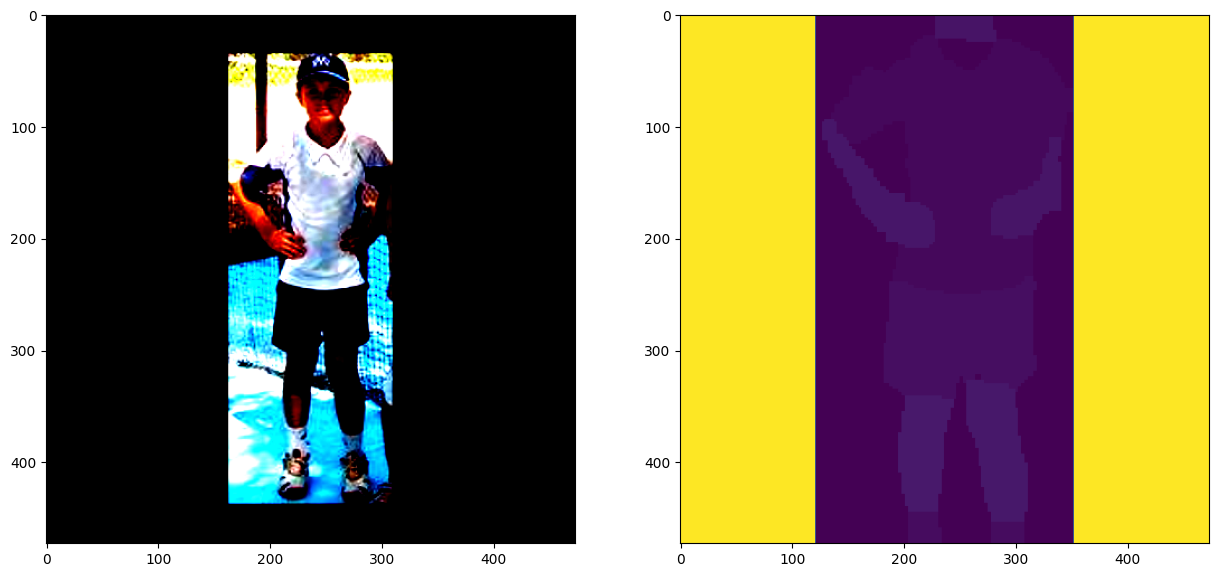

In [37]:
plot_sample(train_dataset, 0)

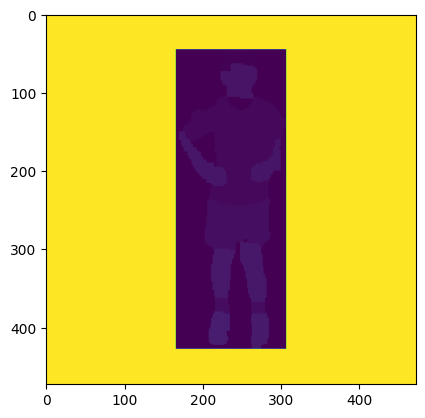

In [41]:
seg_img = train_dataset[0][1]

plt.imshow(seg_img)

In [45]:
seg_img_flat = seg_img.view(-1)
np.unique(seg_img_flat, return_counts=True)

(array([  0,   1,   5,   8,   9,  13,  14,  15,  16,  17,  18,  19, 255],
       dtype=uint8),
 array([ 28434,    892,  10323,    603,   4378,   1620,   1029,   1456,
          1884,   1477,    927,    980, 169726]))

In [ ]:
data_dir = "./data/LIP"

